In [26]:
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import pandas as pd
import json as json

In [27]:
db_client = pymongo.MongoClient('localhost', 27017)

db_ice = db_client.ice
db_ice_posts = db_ice.posts
db_ice_comments = db_ice.comments
db_ice_users = db_ice.users
db_ice_general = db_ice.geral

In [28]:
# Load id data from each transaction per user, following:
# has more than 10 posts
# silence window not bigget than 15 days
# This selection was mad on "Sampling Window Size", in the folder notebook
files = db_ice_general.find_one()
transactions = files['data']

In [29]:
len(transactions)

1212

In [37]:
WINDOW_SIZE = 60*60*24*3 # 3 days

## Creating Baskets
    First Option: Simple collection of Posts in his module window

In [40]:
transactions_simple_basket = []
for t in transactions:
    baskets = []
    tnp = np.array(t[1])
    transaction_phi = get_phase(WINDOW_SIZE,np.asarray(tnp[:,1],dtype=np.float32))
    
    window_time = (tnp[:,1].astype(float)[0] - tnp[:,1].astype(float)[0]%WINDOW_SIZE + transaction_phi - WINDOW_SIZE)
    tmp_basket = []
    basket_pointer = 0
    
    silence_counter = 0
    
#     Fitting the window on the first post
    while(window_time < tnp[:,1].astype(float)[basket_pointer] - WINDOW_SIZE):
        window_time += WINDOW_SIZE
    while(basket_pointer < len(tnp[:,1].astype(float))):
        print(tmp_basket)
        print("\n")
#         Caso em que o ponto cai no intervalo
        if tnp[:,1].astype(float)[basket_pointer]>window_time and tnp[:,1].astype(float)[basket_pointer]<(window_time+WINDOW_SIZE):
            tmp_basket += [tnp[:,0][basket_pointer]]
            silence_counter = 0
            basket_pointer += 1
            print(tmp_basket," ta dentro")


        else:
#             Caiu para frente do intervalo,logo, fechamos esse basket e jogamos a janela para frente
            print(tmp_basket, "dentro")

            if(len(tmp_basket) ==0):
                baskets += [[]]
            else:
                baskets += [tmp_basket]
            tmp_basket = []
            window_time += WINDOW_SIZE
#             if(silence_counter >=5):
#                 basket_pointer+=1
    if(len(tmp_basket)!=0):
        baskets += [tmp_basket]
    transactions_simple_basket += [[t[0],baskets]]

[]


['t3_9u23ix']  ta dentro
['t3_9u23ix']


['t3_9u23ix'] dentro
[]


['t3_9ukpc1']  ta dentro
['t3_9ukpc1']


['t3_9ukpc1'] dentro
[]


[] dentro
[]


['t3_9wlwbe']  ta dentro
['t3_9wlwbe']


['t3_9wlwbe'] dentro
[]


['t3_9xtqik']  ta dentro
['t3_9xtqik']


['t3_9xtqik'] dentro
[]


['t3_9yjeok']  ta dentro
['t3_9yjeok']


['t3_9yjeok'] dentro
[]


[] dentro
[]


['t3_a052y0']  ta dentro
['t3_a052y0']


['t3_a052y0'] dentro
[]


['t3_a11zg1']  ta dentro
['t3_a11zg1']


['t3_a11zg1'] dentro
[]


['t3_a1xohx']  ta dentro
['t3_a1xohx']


['t3_a1xohx', 't3_a274ar']  ta dentro
['t3_a1xohx', 't3_a274ar']


['t3_a1xohx', 't3_a274ar'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_a4z7to']  ta dentro
[]


['t3_511wi7']  ta dentro
['t3_511wi7']


['t3_511wi7', 't3_5125r2']  ta dentro
['t3_511wi7', 't3_5125r2']


['t3_511wi7', 't3_5125r2', 't3_512p2l']  ta dentro
['t3_511wi7', 't3_5125r2', 't3_512p2l']


['t3_511wi7', 't3_5125r2', 't3_512p2l', 't3_514cly']  ta dentro
['t3_511wi7', 't3_5125r2

[]


['t3_4cd0hi']  ta dentro
[]


['t3_8dvy7y']  ta dentro
['t3_8dvy7y']


['t3_8dvy7y', 't3_8dz7zy']  ta dentro
['t3_8dvy7y', 't3_8dz7zy']


['t3_8dvy7y', 't3_8dz7zy', 't3_8e6iwf']  ta dentro
['t3_8dvy7y', 't3_8dz7zy', 't3_8e6iwf']


['t3_8dvy7y', 't3_8dz7zy', 't3_8e6iwf', 't3_8eb90y']  ta dentro
['t3_8dvy7y', 't3_8dz7zy', 't3_8e6iwf', 't3_8eb90y']


['t3_8dvy7y', 't3_8dz7zy', 't3_8e6iwf', 't3_8eb90y', 't3_8ef634']  ta dentro
['t3_8dvy7y', 't3_8dz7zy', 't3_8e6iwf', 't3_8eb90y', 't3_8ef634']


['t3_8dvy7y', 't3_8dz7zy', 't3_8e6iwf', 't3_8eb90y', 't3_8ef634', 't3_8egzks']  ta dentro
['t3_8dvy7y', 't3_8dz7zy', 't3_8e6iwf', 't3_8eb90y', 't3_8ef634', 't3_8egzks']


['t3_8dvy7y', 't3_8dz7zy', 't3_8e6iwf', 't3_8eb90y', 't3_8ef634', 't3_8egzks'] dentro
[]


['t3_8emwca']  ta dentro
['t3_8emwca']


['t3_8emwca', 't3_8ewtqr']  ta dentro
['t3_8emwca', 't3_8ewtqr']


['t3_8emwca', 't3_8ewtqr', 't3_8f0277']  ta dentro
['t3_8emwca', 't3_8ewtqr', 't3_8f0277']


['t3_8emwca', 't3_8ewtqr', 't3_8f0277

['t3_71bb2p']  ta dentro
['t3_71bb2p']


['t3_71bb2p', 't3_71gmib']  ta dentro
['t3_71bb2p', 't3_71gmib']


['t3_71bb2p', 't3_71gmib', 't3_71t5n7']  ta dentro
['t3_71bb2p', 't3_71gmib', 't3_71t5n7']


['t3_71bb2p', 't3_71gmib', 't3_71t5n7', 't3_71t9cg']  ta dentro
['t3_71bb2p', 't3_71gmib', 't3_71t5n7', 't3_71t9cg']


['t3_71bb2p', 't3_71gmib', 't3_71t5n7', 't3_71t9cg'] dentro
[]


[] dentro
[]


['t3_72psoz']  ta dentro
['t3_72psoz']


['t3_72psoz'] dentro
[]


[] dentro
[]


['t3_73xgby']  ta dentro
['t3_73xgby']


['t3_73xgby'] dentro
[]


[] dentro
[]


['t3_75dqhx']  ta dentro
['t3_75dqhx']


['t3_75dqhx'] dentro
[]


['t3_764u9t']  ta dentro
['t3_764u9t']


['t3_764u9t'] dentro
[]


['t3_76gg2q']  ta dentro
['t3_76gg2q']


['t3_76gg2q'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_78nbm5']  ta dentro
['t3_78nbm5']


['t3_78nbm5'] dentro
[]


['t3_795tlc']  ta dentro
['t3_795tlc']


['t3_795tlc'] dentro
[]


[] dentro
[]


['t3_7a028x']  ta dentro
['t3_7a028x']


['t3_7a028x', '

[]


['t3_299boe']  ta dentro
['t3_299boe']


['t3_299boe'] dentro
[]


['t3_29j31u']  ta dentro
['t3_29j31u']


['t3_29j31u'] dentro
[]


['t3_29unz1']  ta dentro
['t3_29unz1']


['t3_29unz1'] dentro
[]


[] dentro
[]


['t3_2aaa0d']  ta dentro
['t3_2aaa0d']


['t3_2aaa0d'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_2b7vfk']  ta dentro
['t3_2b7vfk']


['t3_2b7vfk'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_2c7qmf']  ta dentro
['t3_2c7qmf']


['t3_2c7qmf'] dentro
[]


[] dentro
[]


['t3_2csvs2']  ta dentro
['t3_2csvs2']


['t3_2csvs2'] dentro
[]


[] dentro
[]


['t3_2dc2h3']  ta dentro
['t3_2dc2h3']


['t3_2dc2h3'] dentro
[]


[] dentro
[]


['t3_2dwt4j']  ta dentro
['t3_2dwt4j']


['t3_2dwt4j'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_2f4ebb']  ta dentro
[]


['t3_44wmcc']  ta dentro
['t3_44wmcc']


['t3_44wmcc'] dentro
[]


[] dentro
[]


['t3_4602yz']  ta dentro
['t3_4602yz']


['t3_4602yz'] dentro
[]


[] dentro
[]


['t3_46yyru']  ta 

['t3_5fvl2z'] dentro
[]


[] dentro
[]


['t3_5h5llw']  ta dentro
[]


['t3_3x0hai']  ta dentro
['t3_3x0hai']


['t3_3x0hai'] dentro
[]


['t3_3xg4yv']  ta dentro
['t3_3xg4yv']


['t3_3xg4yv'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_3yqofa']  ta dentro
['t3_3yqofa']


['t3_3yqofa'] dentro
[]


['t3_3z3zzk']  ta dentro
['t3_3z3zzk']


['t3_3z3zzk', 't3_3z7mkt']  ta dentro
['t3_3z3zzk', 't3_3z7mkt']


['t3_3z3zzk', 't3_3z7mkt', 't3_3z8an9']  ta dentro
['t3_3z3zzk', 't3_3z7mkt', 't3_3z8an9']


['t3_3z3zzk', 't3_3z7mkt', 't3_3z8an9'] dentro
[]


['t3_3zijmm']  ta dentro
['t3_3zijmm']


['t3_3zijmm'] dentro
[]


['t3_3zyrud']  ta dentro
['t3_3zyrud']


['t3_3zyrud', 't3_409wjt']  ta dentro
['t3_3zyrud', 't3_409wjt']


['t3_3zyrud', 't3_409wjt', 't3_40a5c5']  ta dentro
['t3_3zyrud', 't3_409wjt', 't3_40a5c5']


['t3_3zyrud', 't3_409wjt', 't3_40a5c5'] dentro
[]


[] dentro
[]


['t3_40wj3s']  ta dentro
['t3_40wj3s']


['t3_40wj3s', 't3_411ka7']  ta dentro
['t3_40wj3s', 't

[]


['t3_awd1o2']  ta dentro
['t3_awd1o2']


['t3_awd1o2'] dentro
[]


['t3_axgkde']  ta dentro
['t3_axgkde']


['t3_axgkde', 't3_axgnyq']  ta dentro
['t3_axgkde', 't3_axgnyq']


['t3_axgkde', 't3_axgnyq', 't3_axhito']  ta dentro
['t3_axgkde', 't3_axgnyq', 't3_axhito']


['t3_axgkde', 't3_axgnyq', 't3_axhito', 't3_axvct5']  ta dentro
['t3_axgkde', 't3_axgnyq', 't3_axhito', 't3_axvct5']


['t3_axgkde', 't3_axgnyq', 't3_axhito', 't3_axvct5', 't3_ay007u']  ta dentro
['t3_axgkde', 't3_axgnyq', 't3_axhito', 't3_axvct5', 't3_ay007u']


['t3_axgkde', 't3_axgnyq', 't3_axhito', 't3_axvct5', 't3_ay007u'] dentro
[]


['t3_aydfz8']  ta dentro
['t3_aydfz8']


['t3_aydfz8', 't3_aye3vj']  ta dentro
['t3_aydfz8', 't3_aye3vj']


['t3_aydfz8', 't3_aye3vj', 't3_ayw1tx']  ta dentro
['t3_aydfz8', 't3_aye3vj', 't3_ayw1tx']


['t3_aydfz8', 't3_aye3vj', 't3_ayw1tx'] dentro
[]


['t3_b0emsa']  ta dentro
['t3_b0emsa']


['t3_b0emsa'] dentro
[]


[] dentro
[]


['t3_b2h3bt']  ta dentro
['t3_b2h3bt']


['t3_b2h3

[]


['t3_3uaxdf']  ta dentro
['t3_3uaxdf']


['t3_3uaxdf'] dentro
[]


['t3_3uoh3j']  ta dentro
['t3_3uoh3j']


['t3_3uoh3j'] dentro
[]


['t3_3v88kx']  ta dentro
['t3_3v88kx']


['t3_3v88kx'] dentro
[]


[] dentro
[]


['t3_3vqamt']  ta dentro
['t3_3vqamt']


['t3_3vqamt', 't3_3vuowo']  ta dentro
['t3_3vqamt', 't3_3vuowo']


['t3_3vqamt', 't3_3vuowo', 't3_3w11k3']  ta dentro
['t3_3vqamt', 't3_3vuowo', 't3_3w11k3']


['t3_3vqamt', 't3_3vuowo', 't3_3w11k3'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_3x6tix']  ta dentro
['t3_3x6tix']


['t3_3x6tix', 't3_3x6vc3']  ta dentro
['t3_3x6tix', 't3_3x6vc3']


['t3_3x6tix', 't3_3x6vc3', 't3_3x6x9i']  ta dentro
['t3_3x6tix', 't3_3x6vc3', 't3_3x6x9i']


['t3_3x6tix', 't3_3x6vc3', 't3_3x6x9i', 't3_3x94p6']  ta dentro
[]


['t3_75au99']  ta dentro
['t3_75au99']


['t3_75au99', 't3_75mg7m']  ta dentro
['t3_75au99', 't3_75mg7m']


['t3_75au99', 't3_75mg7m', 't3_75qno9']  ta dentro
['t3_75au99', 't3_75mg7m', 't3_75qno9']


['t3_75au99', 't3_75mg7m'

['t3_8ate9z']  ta dentro
['t3_8ate9z']


['t3_8ate9z', 't3_8b24y9']  ta dentro
['t3_8ate9z', 't3_8b24y9']


['t3_8ate9z', 't3_8b24y9'] dentro
[]


['t3_8c47yn']  ta dentro
['t3_8c47yn']


['t3_8c47yn'] dentro
[]


[] dentro
[]


['t3_8df19e']  ta dentro
['t3_8df19e']


['t3_8df19e'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_8fir4x']  ta dentro
['t3_8fir4x']


['t3_8fir4x'] dentro
[]


[] dentro
[]


['t3_8grvr8']  ta dentro
['t3_8grvr8']


['t3_8grvr8'] dentro
[]


['t3_8hso8d']  ta dentro
['t3_8hso8d']


['t3_8hso8d'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_8khn28']  ta dentro
['t3_8khn28']


['t3_8khn28'] dentro
[]


['t3_8lf5cu']  ta dentro
['t3_8lf5cu']


['t3_8lf5cu'] dentro
[]


['t3_8lxzzc']  ta dentro
['t3_8lxzzc']


['t3_8lxzzc'] dentro
[]


['t3_8mdws2']  ta dentro
['t3_8mdws2']


['t3_8mdws2', 't3_8mwtf7']  ta dentro
['t3_8mdws2', 't3_8mwtf7']


['t3_8mdws2', 't3_8mwtf7'] dentro
[]


[] dentro
[]


['t3_8o1kys']  ta dentro
[]


['t3_8wskf9']  ta de

[]


['t3_90uwah']  ta dentro
['t3_90uwah']


['t3_90uwah', 't3_912ksu']  ta dentro
['t3_90uwah', 't3_912ksu']


['t3_90uwah', 't3_912ksu'] dentro
[]


['t3_91dim3']  ta dentro
['t3_91dim3']


['t3_91dim3', 't3_91lwha']  ta dentro
['t3_91dim3', 't3_91lwha']


['t3_91dim3', 't3_91lwha'] dentro
[]


[] dentro
[]


['t3_93j8xw']  ta dentro
['t3_93j8xw']


['t3_93j8xw'] dentro
[]


['t3_93wbgm']  ta dentro
['t3_93wbgm']


['t3_93wbgm', 't3_942b41']  ta dentro
['t3_93wbgm', 't3_942b41']


['t3_93wbgm', 't3_942b41', 't3_94dphz']  ta dentro
['t3_93wbgm', 't3_942b41', 't3_94dphz']


['t3_93wbgm', 't3_942b41', 't3_94dphz'] dentro
[]


[] dentro
[]


['t3_963gzz']  ta dentro
['t3_963gzz']


['t3_963gzz'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_98fug4']  ta dentro
['t3_98fug4']


['t3_98fug4'] dentro
[]


[] dentro
[]


['t3_9a2yzu']  ta dentro
['t3_9a2yzu']


['t3_9a2yzu', 't3_9a9l1g']  ta dentro
['t3_9a2yzu', 't3_9a9l1g']


['t3_9a2yzu', 't3_9a9l1g'] dentro
[]


['t3_9amktg']  ta dentro


['t3_5pjsm5', 't3_5pooxe']  ta dentro
['t3_5pjsm5', 't3_5pooxe']


['t3_5pjsm5', 't3_5pooxe', 't3_5psakr']  ta dentro
['t3_5pjsm5', 't3_5pooxe', 't3_5psakr']


['t3_5pjsm5', 't3_5pooxe', 't3_5psakr', 't3_5psewx']  ta dentro
['t3_5pjsm5', 't3_5pooxe', 't3_5psakr', 't3_5psewx']


['t3_5pjsm5', 't3_5pooxe', 't3_5psakr', 't3_5psewx', 't3_5pw6w4']  ta dentro
['t3_5pjsm5', 't3_5pooxe', 't3_5psakr', 't3_5psewx', 't3_5pw6w4']


['t3_5pjsm5', 't3_5pooxe', 't3_5psakr', 't3_5psewx', 't3_5pw6w4', 't3_5pzh4q']  ta dentro
['t3_5pjsm5', 't3_5pooxe', 't3_5psakr', 't3_5psewx', 't3_5pw6w4', 't3_5pzh4q']


['t3_5pjsm5', 't3_5pooxe', 't3_5psakr', 't3_5psewx', 't3_5pw6w4', 't3_5pzh4q'] dentro
[]


['t3_5q7tno']  ta dentro
['t3_5q7tno']


['t3_5q7tno', 't3_5q7yc3']  ta dentro
['t3_5q7tno', 't3_5q7yc3']


['t3_5q7tno', 't3_5q7yc3', 't3_5qim2s']  ta dentro
['t3_5q7tno', 't3_5q7yc3', 't3_5qim2s']


['t3_5q7tno', 't3_5q7yc3', 't3_5qim2s', 't3_5qj7xr']  ta dentro
['t3_5q7tno', 't3_5q7yc3', 't3_5qim2s', 't3_5qj7x


['t3_5hdcl6', 't3_5hdhd1', 't3_5hdknz', 't3_5hdyf8', 't3_5he6e1', 't3_5hi8kc', 't3_5ho8o6']  ta dentro
['t3_5hdcl6', 't3_5hdhd1', 't3_5hdknz', 't3_5hdyf8', 't3_5he6e1', 't3_5hi8kc', 't3_5ho8o6']


['t3_5hdcl6', 't3_5hdhd1', 't3_5hdknz', 't3_5hdyf8', 't3_5he6e1', 't3_5hi8kc', 't3_5ho8o6'] dentro
[]


['t3_5hq12d']  ta dentro
[]


['t3_4wd8f6']  ta dentro
['t3_4wd8f6']


['t3_4wd8f6'] dentro
[]


['t3_4x0iuy']  ta dentro
['t3_4x0iuy']


['t3_4x0iuy'] dentro
[]


['t3_4xa9f2']  ta dentro
['t3_4xa9f2']


['t3_4xa9f2', 't3_4xh56y']  ta dentro
['t3_4xa9f2', 't3_4xh56y']


['t3_4xa9f2', 't3_4xh56y', 't3_4xhntd']  ta dentro
['t3_4xa9f2', 't3_4xh56y', 't3_4xhntd']


['t3_4xa9f2', 't3_4xh56y', 't3_4xhntd'] dentro
[]


[] dentro
[]


['t3_4y7gnc']  ta dentro
['t3_4y7gnc']


['t3_4y7gnc', 't3_4ybe1h']  ta dentro
['t3_4y7gnc', 't3_4ybe1h']


['t3_4y7gnc', 't3_4ybe1h', 't3_4yfkk0']  ta dentro
['t3_4y7gnc', 't3_4ybe1h', 't3_4yfkk0']


['t3_4y7gnc', 't3_4ybe1h', 't3_4yfkk0'] dentro
[]


[] dentro
[]


['t3_azcz5e', 't3_azczrp']  ta dentro
['t3_azcz5e', 't3_azczrp']


['t3_azcz5e', 't3_azczrp', 't3_azd09k']  ta dentro
['t3_azcz5e', 't3_azczrp', 't3_azd09k']


['t3_azcz5e', 't3_azczrp', 't3_azd09k', 't3_azd23d']  ta dentro
['t3_azcz5e', 't3_azczrp', 't3_azd09k', 't3_azd23d']


['t3_azcz5e', 't3_azczrp', 't3_azd09k', 't3_azd23d', 't3_azd2w8']  ta dentro
['t3_azcz5e', 't3_azczrp', 't3_azd09k', 't3_azd23d', 't3_azd2w8']


['t3_azcz5e', 't3_azczrp', 't3_azd09k', 't3_azd23d', 't3_azd2w8', 't3_azoir4']  ta dentro
['t3_azcz5e', 't3_azczrp', 't3_azd09k', 't3_azd23d', 't3_azd2w8', 't3_azoir4']


['t3_azcz5e', 't3_azczrp', 't3_azd09k', 't3_azd23d', 't3_azd2w8', 't3_azoir4'] dentro
[]


['t3_b03bsv']  ta dentro
['t3_b03bsv']


['t3_b03bsv', 't3_b0gutt']  ta dentro
['t3_b03bsv', 't3_b0gutt']


['t3_b03bsv', 't3_b0gutt', 't3_b0uvzc']  ta dentro
['t3_b03bsv', 't3_b0gutt', 't3_b0uvzc']


['t3_b03bsv', 't3_b0gutt', 't3_b0uvzc'] dentro
[]


['t3_b19oy1']  ta dentro
['t3_b19oy1']


['t3_b19oy1', 't3_b1

['t3_7mx91f', 't3_7myay6'] dentro
[]


['t3_7ntdu7']  ta dentro
[]


['t3_ba2o22']  ta dentro
['t3_ba2o22']


['t3_ba2o22'] dentro
[]


[] dentro
[]


['t3_bd320e']  ta dentro
['t3_bd320e']


['t3_bd320e'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_bh0y4j']  ta dentro
['t3_bh0y4j']


['t3_bh0y4j'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_bl576w']  ta dentro
['t3_bl576w']


['t3_bl576w'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_bplmhk']  ta dentro
['t3_bplmhk']


['t3_bplmhk'] dentro
[]


[] dentro
[]


['t3_bs97gg']  ta dentro
['t3_bs97gg']


['t3_bs97gg'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_bw3ktz']  ta dentro
['t3_bw3ktz']


['t3_bw3ktz'] dentro
[]


[] dentro
[]


['t3_byr05n']  ta dentro
['t3_byr05n']


['t3_byr05n', 't3_byrs9g']  ta dentro
['t3_byr05n', 't3_byrs9g']


['t3_byr05n', 't3_byrs9g', 't3_bysr5c']  ta dentro
['t3_byr05n', 't3_byrs9g', 't3_bysr5c']


['t3_byr05n', 't3_byrs9g', 't3_bysr5c'] dentro
[]



[]


['t3_bmlsai']  ta dentro
['t3_bmlsai']


['t3_bmlsai'] dentro
[]


[] dentro
[]


['t3_boli2m']  ta dentro
['t3_boli2m']


['t3_boli2m'] dentro
[]


[] dentro
[]


['t3_briw39']  ta dentro
['t3_briw39']


['t3_briw39'] dentro
[]


['t3_bsn6gf']  ta dentro
['t3_bsn6gf']


['t3_bsn6gf'] dentro
[]


['t3_btgphg']  ta dentro
['t3_btgphg']


['t3_btgphg'] dentro
[]


['t3_bu9ems']  ta dentro
['t3_bu9ems']


['t3_bu9ems', 't3_buw238']  ta dentro
['t3_bu9ems', 't3_buw238']


['t3_bu9ems', 't3_buw238'] dentro
[]


[] dentro
[]


['t3_bx4plk']  ta dentro
['t3_bx4plk']


['t3_bx4plk'] dentro
[]


['t3_by3pc2']  ta dentro
['t3_by3pc2']


['t3_by3pc2'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_c1ixwj']  ta dentro
['t3_c1ixwj']


['t3_c1ixwj'] dentro
[]


['t3_c34hsr']  ta dentro
['t3_c34hsr']


['t3_c34hsr', 't3_c3ejeu']  ta dentro
['t3_c34hsr', 't3_c3ejeu']


['t3_c34hsr', 't3_c3ejeu'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_c7vr4y']  ta dentro
[]


['t3_be5gr6']  

[]


['t3_7at0pf']  ta dentro
['t3_7at0pf']


['t3_7at0pf', 't3_7axnj4']  ta dentro
['t3_7at0pf', 't3_7axnj4']


['t3_7at0pf', 't3_7axnj4'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_7dmwhc']  ta dentro
['t3_7dmwhc']


['t3_7dmwhc'] dentro
[]


[] dentro
[]


['t3_7f83z7']  ta dentro
[]


['t3_7qmgne']  ta dentro
['t3_7qmgne']


['t3_7qmgne'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_7sgmj1']  ta dentro
['t3_7sgmj1']


['t3_7sgmj1'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_7vgfni']  ta dentro
['t3_7vgfni']


['t3_7vgfni'] dentro
[]


[] dentro
[]


['t3_7wokjb']  ta dentro
['t3_7wokjb']


['t3_7wokjb'] dentro
[]


[] dentro
[]


['t3_7y74qd']  ta dentro
['t3_7y74qd']


['t3_7y74qd'] dentro
[]


['t3_7yqv39']  ta dentro
['t3_7yqv39']


['t3_7yqv39', 't3_7yzqsa']  ta dentro
['t3_7yqv39', 't3_7yzqsa']


['t3_7yqv39', 't3_7yzqsa'] dentro
[]


['t3_7zhbdz']  ta dentro
['t3_7zhbdz']


['t3_7zhbdz'] dentro
[]


['t3_80ggg2']  ta dentro
['t3_80ggg2'

['t3_7tpgfa'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_7w2jn2']  ta dentro
['t3_7w2jn2']


['t3_7w2jn2'] dentro
[]


['t3_7wukvv']  ta dentro
['t3_7wukvv']


['t3_7wukvv'] dentro
[]


['t3_7xn2t8']  ta dentro
[]


['t3_6u8zr3']  ta dentro
['t3_6u8zr3']


['t3_6u8zr3'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_6w62ma']  ta dentro
['t3_6w62ma']


['t3_6w62ma', 't3_6wbko5']  ta dentro
['t3_6w62ma', 't3_6wbko5']


['t3_6w62ma', 't3_6wbko5'] dentro
[]


['t3_6wozg4']  ta dentro
['t3_6wozg4']


['t3_6wozg4', 't3_6wqlpz']  ta dentro
['t3_6wozg4', 't3_6wqlpz']


['t3_6wozg4', 't3_6wqlpz', 't3_6wxust']  ta dentro
['t3_6wozg4', 't3_6wqlpz', 't3_6wxust']


['t3_6wozg4', 't3_6wqlpz', 't3_6wxust'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_6yezjd']  ta dentro
['t3_6yezjd']


['t3_6yezjd'] dentro
[]


[] dentro
[]


['t3_6zlty1']  ta dentro
['t3_6zlty1']


['t3_6zlty1'] dentro
[]


['t3_70mo24']  ta dentro
['t3_70mo24']


['t3_70mo24'] dentro
[]


['t3_70uelg']  ta dentro
['t3_70uelg'

['t3_5yupfp'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_60ppzq']  ta dentro
['t3_60ppzq']


['t3_60ppzq'] dentro
[]


['t3_613jwp']  ta dentro
['t3_613jwp']


['t3_613jwp'] dentro
[]


['t3_61npgj']  ta dentro
['t3_61npgj']


['t3_61npgj'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_63xj7q']  ta dentro
['t3_63xj7q']


['t3_63xj7q'] dentro
[]


[] dentro
[]


['t3_64zije']  ta dentro
[]


['t3_5ot30n']  ta dentro
['t3_5ot30n']


['t3_5ot30n'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_5r57ur']  ta dentro
['t3_5r57ur']


['t3_5r57ur'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_5tl7j4']  ta dentro
['t3_5tl7j4']


['t3_5tl7j4', 't3_5tovvi']  ta dentro
['t3_5tl7j4', 't3_5tovvi']


['t3_5tl7j4', 't3_5tovvi'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_5v8zno']  ta dentro
['t3_5v8zno']


['t3_5v8zno'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_5y4bwn']  ta dentro
['t3_5y4bwn']


['t3_5y4bwn'] dentro
[]


[] den

['t3_4lsm55']  ta dentro
['t3_4lsm55']


['t3_4lsm55'] dentro
[]


[] dentro
[]


['t3_4mp12m']  ta dentro
['t3_4mp12m']


['t3_4mp12m'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_4om3x8']  ta dentro
['t3_4om3x8']


['t3_4om3x8'] dentro
[]


['t3_4ov713']  ta dentro
['t3_4ov713']


['t3_4ov713', 't3_4p1hqu']  ta dentro
['t3_4ov713', 't3_4p1hqu']


['t3_4ov713', 't3_4p1hqu'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_4qhl1g']  ta dentro
['t3_4qhl1g']


['t3_4qhl1g'] dentro
[]


[] dentro
[]


['t3_4r7igm']  ta dentro
['t3_4r7igm']


['t3_4r7igm'] dentro
[]


[] dentro
[]


['t3_4sd1pj']  ta dentro
['t3_4sd1pj']


['t3_4sd1pj', 't3_4sh1pa']  ta dentro
['t3_4sd1pj', 't3_4sh1pa']


['t3_4sd1pj', 't3_4sh1pa'] dentro
[]


['t3_4t1u0f']  ta dentro
['t3_4t1u0f']


['t3_4t1u0f'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_4uqq50']  ta dentro
['t3_4uqq50']


['t3_4uqq50'] dentro
[]


['t3_4v44jr']  ta dentro
[]


['t3_2rob1h']  ta dentro
['t3_2rob1h']


[

['t3_5gmlcp']  ta dentro
['t3_5gmlcp']


['t3_5gmlcp', 't3_5gu866']  ta dentro
['t3_5gmlcp', 't3_5gu866']


['t3_5gmlcp', 't3_5gu866'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_5ilclu']  ta dentro
['t3_5ilclu']


['t3_5ilclu'] dentro
[]


[] dentro
[]


['t3_5jgixk']  ta dentro
['t3_5jgixk']


['t3_5jgixk', 't3_5jmghz']  ta dentro
[]


['t3_9r7ikr']  ta dentro
['t3_9r7ikr']


['t3_9r7ikr'] dentro
[]


[] dentro
[]


['t3_9ske97']  ta dentro
['t3_9ske97']


['t3_9ske97'] dentro
[]


['t3_9tg3nf']  ta dentro
['t3_9tg3nf']


['t3_9tg3nf'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_9wvg7m']  ta dentro
['t3_9wvg7m']


['t3_9wvg7m'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_9z8tic']  ta dentro
['t3_9z8tic']


['t3_9z8tic'] dentro
[]


[] dentro
[]


['t3_a13ef4']  ta dentro
['t3_a13ef4']


['t3_a13ef4', 't3_a1dgxa']  ta dentro
['t3_a13ef4', 't3_a1dgxa']


['t3_a13ef4', 't3_a1dgxa', 't3_a1nbr8']  ta dentro
['t3_a13ef4', 't3_a1dgxa', 't3_a1nbr8']


['t3_a13ef4', 't

['t3_2n999b']


['t3_2n999b'] dentro
[]


['t3_2nhfbv']  ta dentro
['t3_2nhfbv']


['t3_2nhfbv'] dentro
[]


[] dentro
[]


['t3_2nwuwq']  ta dentro
['t3_2nwuwq']


['t3_2nwuwq'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_2pfm7v']  ta dentro
['t3_2pfm7v']


['t3_2pfm7v', 't3_2pjopw']  ta dentro
['t3_2pfm7v', 't3_2pjopw']


['t3_2pfm7v', 't3_2pjopw', 't3_2ppfyk']  ta dentro
['t3_2pfm7v', 't3_2pjopw', 't3_2ppfyk']


['t3_2pfm7v', 't3_2pjopw', 't3_2ppfyk'] dentro
[]


['t3_2psj78']  ta dentro
['t3_2psj78']


['t3_2psj78'] dentro
[]


['t3_2q7oc7']  ta dentro
['t3_2q7oc7']


['t3_2q7oc7'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_2rn0lz']  ta dentro
['t3_2rn0lz']


['t3_2rn0lz'] dentro
[]


['t3_2rw864']  ta dentro
['t3_2rw864']


['t3_2rw864', 't3_2s14px']  ta dentro
['t3_2rw864', 't3_2s14px']


['t3_2rw864', 't3_2s14px'] dentro
[]


['t3_2s8fz9']  ta dentro
['t3_2s8fz9']


['t3_2s8fz9'] dentro
[]


[] dentro
[]


[] den

[]


['t3_7a768g']  ta dentro
['t3_7a768g']


['t3_7a768g', 't3_7ac5n9']  ta dentro
['t3_7a768g', 't3_7ac5n9']


['t3_7a768g', 't3_7ac5n9'] dentro
[]


['t3_7aq6yg']  ta dentro
['t3_7aq6yg']


['t3_7aq6yg', 't3_7asahp']  ta dentro
['t3_7aq6yg', 't3_7asahp']


['t3_7aq6yg', 't3_7asahp', 't3_7b3d2d']  ta dentro
['t3_7aq6yg', 't3_7asahp', 't3_7b3d2d']


['t3_7aq6yg', 't3_7asahp', 't3_7b3d2d'] dentro
[]


['t3_7b4r0h']  ta dentro
['t3_7b4r0h']


['t3_7b4r0h', 't3_7bd3z4']  ta dentro
['t3_7b4r0h', 't3_7bd3z4']


['t3_7b4r0h', 't3_7bd3z4', 't3_7bmpkx']  ta dentro
['t3_7b4r0h', 't3_7bd3z4', 't3_7bmpkx']


['t3_7b4r0h', 't3_7bd3z4', 't3_7bmpkx', 't3_7bsjev']  ta dentro
['t3_7b4r0h', 't3_7bd3z4', 't3_7bmpkx', 't3_7bsjev']


['t3_7b4r0h', 't3_7bd3z4', 't3_7bmpkx', 't3_7bsjev'] dentro
[]


[] dentro
[]


['t3_7coxly']  ta dentro
['t3_7coxly']


['t3_7coxly'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_7g544i']  ta dentro
[]


['t3_9xy0tg']  ta dentro
['t3_9xy0tg']

['t3_7hdj21']


['t3_7hdj21'] dentro
[]


['t3_7i2egs']  ta dentro
['t3_7i2egs']


['t3_7i2egs'] dentro
[]


['t3_7ik13y']  ta dentro
['t3_7ik13y']


['t3_7ik13y'] dentro
[]


[] dentro
[]


['t3_7jwr6j']  ta dentro
['t3_7jwr6j']


['t3_7jwr6j'] dentro
[]


['t3_7l1prv']  ta dentro
['t3_7l1prv']


['t3_7l1prv'] dentro
[]


['t3_7li56c']  ta dentro
['t3_7li56c']


['t3_7li56c'] dentro
[]


[] dentro
[]


['t3_7mngru']  ta dentro
['t3_7mngru']


['t3_7mngru'] dentro
[]


[] dentro
[]


['t3_7o3aw4']  ta dentro
['t3_7o3aw4']


['t3_7o3aw4'] dentro
[]


[] dentro
[]


['t3_7piffa']  ta dentro
['t3_7piffa']


['t3_7piffa'] dentro
[]


['t3_7ppmnj']  ta dentro
['t3_7ppmnj']


['t3_7ppmnj', 't3_7q1gse']  ta dentro
['t3_7ppmnj', 't3_7q1gse']


['t3_7ppmnj', 't3_7q1gse'] dentro
[]


['t3_7qnyke']  ta dentro
['t3_7qnyke']


['t3_7qnyke', 't3_7qp8mx']  ta dentro
['t3_7qnyke', 't3_7qp8mx']


['t3_7qnyke', 't3_7qp8mx'] dentro
[]


['t3_7riikj']  ta dentro
['t3_7riikj']


['t3_7riikj', 't3_7rm6nh'] 

['t3_alemdq', 't3_almsn0', 't3_alzbm9', 't3_am4rw9', 't3_am6c9h']  ta dentro
['t3_alemdq', 't3_almsn0', 't3_alzbm9', 't3_am4rw9', 't3_am6c9h']


['t3_alemdq', 't3_almsn0', 't3_alzbm9', 't3_am4rw9', 't3_am6c9h', 't3_am8oy4']  ta dentro
['t3_alemdq', 't3_almsn0', 't3_alzbm9', 't3_am4rw9', 't3_am6c9h', 't3_am8oy4']


['t3_alemdq', 't3_almsn0', 't3_alzbm9', 't3_am4rw9', 't3_am6c9h', 't3_am8oy4', 't3_amb5d2']  ta dentro
['t3_alemdq', 't3_almsn0', 't3_alzbm9', 't3_am4rw9', 't3_am6c9h', 't3_am8oy4', 't3_amb5d2']


['t3_alemdq', 't3_almsn0', 't3_alzbm9', 't3_am4rw9', 't3_am6c9h', 't3_am8oy4', 't3_amb5d2'] dentro
[]


['t3_amtfkf']  ta dentro
['t3_amtfkf']


['t3_amtfkf', 't3_amv5qt']  ta dentro
['t3_amtfkf', 't3_amv5qt']


['t3_amtfkf', 't3_amv5qt', 't3_anajz6']  ta dentro
['t3_amtfkf', 't3_amv5qt', 't3_anajz6']


['t3_amtfkf', 't3_amv5qt', 't3_anajz6'] dentro
[]


['t3_anhewt']  ta dentro
['t3_anhewt']


['t3_anhewt', 't3_anrkx3']  ta dentro
['t3_anhewt', 't3_anrkx3']


['t3_anhewt', 't3_anrk

['t3_c4b4s2', 't3_c4had0']  ta dentro
['t3_c4b4s2', 't3_c4had0']


['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg']  ta dentro
['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg']


['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg', 't3_c4qgid']  ta dentro
['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg', 't3_c4qgid']


['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg', 't3_c4qgid', 't3_c51dve']  ta dentro
['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg', 't3_c4qgid', 't3_c51dve']


['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg', 't3_c4qgid', 't3_c51dve', 't3_c52vys']  ta dentro
['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg', 't3_c4qgid', 't3_c51dve', 't3_c52vys']


['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg', 't3_c4qgid', 't3_c51dve', 't3_c52vys', 't3_c5mc05']  ta dentro
['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg', 't3_c4qgid', 't3_c51dve', 't3_c52vys', 't3_c5mc05']


['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg', 't3_c4qgid', 't3_c51dve', 't3_c52vys', 't3_c5mc05', 't3_c5mf9d']  ta dentro
['t3_c4b4s2', 't3_c4had0', 't3_c4hjpg', 't3_c4qgid', 't3_c51dve', 't3_c52vys', 't3_c5mc05', 

['t3_pn60t']


['t3_pn60t'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_pxh1c']  ta dentro
['t3_pxh1c']


['t3_pxh1c'] dentro
[]


['t3_q4zqw']  ta dentro
[]


['t3_6wnqel']  ta dentro
['t3_6wnqel']


['t3_6wnqel'] dentro
[]


['t3_6xg2ys']  ta dentro
['t3_6xg2ys']


['t3_6xg2ys'] dentro
[]


['t3_6y595j']  ta dentro
['t3_6y595j']


['t3_6y595j'] dentro
[]


['t3_6yjxzz']  ta dentro
['t3_6yjxzz']


['t3_6yjxzz'] dentro
[]


[] dentro
[]


['t3_6zjqs6']  ta dentro
['t3_6zjqs6']


['t3_6zjqs6'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_71nqkw']  ta dentro
['t3_71nqkw']


['t3_71nqkw', 't3_71v12h']  ta dentro
['t3_71nqkw', 't3_71v12h']


['t3_71nqkw', 't3_71v12h'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_74c2i1']  ta dentro
['t3_74c2i1']


['t3_74c2i1'] dentro
[]


['t3_74q3l1']  ta dentro
['t3_74q3l1']


['t3_74q3l1'] dentro
[]


[] dentro
[]


['t3_75tdx6']  ta dentro
['t3_75tdx6']


['t3_75tdx6', 't3_76bklp']  ta dentro
[]


['t3_2lrei6']  ta dentro
['t3_2l

['t3_54bkhs', 't3_54fxhp', 't3_54fxhq', 't3_54mxzo', 't3_54p8py']


['t3_54bkhs', 't3_54fxhp', 't3_54fxhq', 't3_54mxzo', 't3_54p8py'] dentro
[]


['t3_54wsyz']  ta dentro
['t3_54wsyz']


['t3_54wsyz', 't3_556bxh']  ta dentro
[]


['t3_76rwwo']  ta dentro
['t3_76rwwo']


['t3_76rwwo'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_79vxgd']  ta dentro
['t3_79vxgd']


['t3_79vxgd', 't3_7a2n0l']  ta dentro
['t3_79vxgd', 't3_7a2n0l']


['t3_79vxgd', 't3_7a2n0l'] dentro
[]


[] dentro
[]


['t3_7azj1d']  ta dentro
['t3_7azj1d']


['t3_7azj1d', 't3_7b5rzd']  ta dentro
['t3_7azj1d', 't3_7b5rzd']


['t3_7azj1d', 't3_7b5rzd'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_7deovl']  ta dentro
['t3_7deovl']


['t3_7deovl'] dentro
[]


['t3_7dlkh5']  ta dentro
['t3_7dlkh5']


['t3_7dlkh5', 't3_7ds5hy']  ta dentro
['t3_7dlkh5', 't3_7ds5hy']


['t3_7dlkh5', 't3_7ds5hy', 't3_7dt38u']  ta dentro
['t3_7dlkh5', 't3_7ds5hy', 't3_7dt38u']


['t3_7dlkh5', 't3_7ds5hy', 't3_7dt38


['t3_1kqq78'] dentro
[]


['t3_1l37n6']  ta dentro
['t3_1l37n6']


['t3_1l37n6'] dentro
[]


['t3_1l7zc9']  ta dentro
[]


['t3_90opz6']  ta dentro
['t3_90opz6']


['t3_90opz6', 't3_90rvz3']  ta dentro
['t3_90opz6', 't3_90rvz3']


['t3_90opz6', 't3_90rvz3', 't3_90s1tn']  ta dentro
['t3_90opz6', 't3_90rvz3', 't3_90s1tn']


['t3_90opz6', 't3_90rvz3', 't3_90s1tn'] dentro
[]


['t3_914170']  ta dentro
['t3_914170']


['t3_914170', 't3_915ha2']  ta dentro
['t3_914170', 't3_915ha2']


['t3_914170', 't3_915ha2', 't3_91bn0r']  ta dentro
['t3_914170', 't3_915ha2', 't3_91bn0r']


['t3_914170', 't3_915ha2', 't3_91bn0r', 't3_91fik6']  ta dentro
['t3_914170', 't3_915ha2', 't3_91bn0r', 't3_91fik6']


['t3_914170', 't3_915ha2', 't3_91bn0r', 't3_91fik6'] dentro
[]


['t3_91xglv']  ta dentro
['t3_91xglv']


['t3_91xglv', 't3_9205qa']  ta dentro
['t3_91xglv', 't3_9205qa']


['t3_91xglv', 't3_9205qa', 't3_92acfw']  ta dentro
[]


['t3_26fhtk']  ta dentro
['t3_26fhtk']


['t3_26fhtk', 't3_26fnod']  ta de

['t3_8ag0dx', 't3_8ag22f']  ta dentro
['t3_8ag0dx', 't3_8ag22f']


['t3_8ag0dx', 't3_8ag22f', 't3_8alzqb']  ta dentro
['t3_8ag0dx', 't3_8ag22f', 't3_8alzqb']


['t3_8ag0dx', 't3_8ag22f', 't3_8alzqb', 't3_8amwyw']  ta dentro
['t3_8ag0dx', 't3_8ag22f', 't3_8alzqb', 't3_8amwyw']


['t3_8ag0dx', 't3_8ag22f', 't3_8alzqb', 't3_8amwyw', 't3_8anuzs']  ta dentro
['t3_8ag0dx', 't3_8ag22f', 't3_8alzqb', 't3_8amwyw', 't3_8anuzs']


['t3_8ag0dx', 't3_8ag22f', 't3_8alzqb', 't3_8amwyw', 't3_8anuzs', 't3_8auze0']  ta dentro
['t3_8ag0dx', 't3_8ag22f', 't3_8alzqb', 't3_8amwyw', 't3_8anuzs', 't3_8auze0']


['t3_8ag0dx', 't3_8ag22f', 't3_8alzqb', 't3_8amwyw', 't3_8anuzs', 't3_8auze0'] dentro
[]


['t3_8b4687']  ta dentro
['t3_8b4687']


['t3_8b4687', 't3_8bdvr5']  ta dentro
['t3_8b4687', 't3_8bdvr5']


['t3_8b4687', 't3_8bdvr5', 't3_8bn0gd']  ta dentro
['t3_8b4687', 't3_8bdvr5', 't3_8bn0gd']


['t3_8b4687', 't3_8bdvr5', 't3_8bn0gd'] dentro
[]


['t3_8c5qi3']  ta dentro
['t3_8c5qi3']


['t3_8c5qi3'] dentro

[]


['t3_8yl6tn']  ta dentro
['t3_8yl6tn']


['t3_8yl6tn'] dentro
[]


['t3_8zegin']  ta dentro
['t3_8zegin']


['t3_8zegin', 't3_8zl9b6']  ta dentro
['t3_8zegin', 't3_8zl9b6']


['t3_8zegin', 't3_8zl9b6', 't3_8zzgjx']  ta dentro
['t3_8zegin', 't3_8zl9b6', 't3_8zzgjx']


['t3_8zegin', 't3_8zl9b6', 't3_8zzgjx'] dentro
[]


['t3_90t1ws']  ta dentro
['t3_90t1ws']


['t3_90t1ws'] dentro
[]


['t3_916tyi']  ta dentro
['t3_916tyi']


['t3_916tyi', 't3_917mfr']  ta dentro
['t3_916tyi', 't3_917mfr']


['t3_916tyi', 't3_917mfr', 't3_919j1j']  ta dentro
['t3_916tyi', 't3_917mfr', 't3_919j1j']


['t3_916tyi', 't3_917mfr', 't3_919j1j', 't3_91bnyj']  ta dentro
['t3_916tyi', 't3_917mfr', 't3_919j1j', 't3_91bnyj']


['t3_916tyi', 't3_917mfr', 't3_919j1j', 't3_91bnyj', 't3_91og2c']  ta dentro
['t3_916tyi', 't3_917mfr', 't3_919j1j', 't3_91bnyj', 't3_91og2c']


['t3_916tyi', 't3_917mfr', 't3_919j1j', 't3_91bnyj', 't3_91og2c'] dentro
[]


['t3_91rxlz']  ta dentro
['t3_91rxlz']


['t3_91rxlz', 't3_929gjd

[]


['t3_3ju1cc']  ta dentro
['t3_3ju1cc']


['t3_3ju1cc'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_3lkwvx']  ta dentro
['t3_3lkwvx']


['t3_3lkwvx'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_3nf1f6']  ta dentro
['t3_3nf1f6']


['t3_3nf1f6'] dentro
[]


['t3_3nss9p']  ta dentro
['t3_3nss9p']


['t3_3nss9p'] dentro
[]


[] dentro
[]


['t3_3ojib2']  ta dentro
['t3_3ojib2']


['t3_3ojib2', 't3_3ooloe']  ta dentro
['t3_3ojib2', 't3_3ooloe']


['t3_3ojib2', 't3_3ooloe'] dentro
[]


[] dentro
[]


['t3_3pg9r7']  ta dentro
['t3_3pg9r7']


['t3_3pg9r7'] dentro
[]


['t3_3pur0l']  ta dentro
['t3_3pur0l']


['t3_3pur0l', 't3_3puy35']  ta dentro
['t3_3pur0l', 't3_3puy35']


['t3_3pur0l', 't3_3puy35'] dentro
[]


[] dentro
[]


['t3_3qj9t4']  ta dentro
[]


['t3_bx12vq']  ta dentro
['t3_bx12vq']


['t3_bx12vq'] dentro
[]


['t3_bxtfxh']  ta dentro
['t3_bxtfxh']


['t3_bxtfxh'] dentro
[]


['t3_bynjv3']  ta dentro
['t3_bynjv3']


['t3_bynjv3



[] dentro
[]


['t3_8j9clf']  ta dentro
['t3_8j9clf']


['t3_8j9clf', 't3_8jgo3y']  ta dentro
['t3_8j9clf', 't3_8jgo3y']


['t3_8j9clf', 't3_8jgo3y'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_8lg72u']  ta dentro
['t3_8lg72u']


['t3_8lg72u', 't3_8lylil']  ta dentro
['t3_8lg72u', 't3_8lylil']


['t3_8lg72u', 't3_8lylil'] dentro
[]


['t3_8mf2ku']  ta dentro
['t3_8mf2ku']


['t3_8mf2ku'] dentro
[]


[] dentro
[]


['t3_8nypak']  ta dentro
['t3_8nypak']


['t3_8nypak'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_8r8a8k']  ta dentro
[]


['t3_54dkzv']  ta dentro
['t3_54dkzv']


['t3_54dkzv'] dentro
[]


['t3_54ug1n']  ta dentro
['t3_54ug1n']


['t3_54ug1n'] dentro
[]


[] dentro
[]


['t3_55qf9w']  ta dentro
['t3_55qf9w']


['t3_55qf9w'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_571k7y']  ta dentro
['t3_571k7y']


['t3_571k7y'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_58v7f5']  ta dentro
['t3_58v7f5']


['t3_58v7f5'] dentro
[]


[] dentro
[]


['t3_59jw3

[]


['t3_3uv6ue']  ta dentro
['t3_3uv6ue']


['t3_3uv6ue'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_3wlb59']  ta dentro
['t3_3wlb59']


['t3_3wlb59', 't3_3wo7sk']  ta dentro
['t3_3wlb59', 't3_3wo7sk']


['t3_3wlb59', 't3_3wo7sk'] dentro
[]


['t3_3x04i4']  ta dentro
['t3_3x04i4']


['t3_3x04i4', 't3_3x525p']  ta dentro
['t3_3x04i4', 't3_3x525p']


['t3_3x04i4', 't3_3x525p', 't3_3x71ag']  ta dentro
['t3_3x04i4', 't3_3x525p', 't3_3x71ag']


['t3_3x04i4', 't3_3x525p', 't3_3x71ag'] dentro
[]


['t3_3xgfkb']  ta dentro
['t3_3xgfkb']


['t3_3xgfkb'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_3yifs9']  ta dentro
[]


['t3_iz5j7']  ta dentro
['t3_iz5j7']


['t3_iz5j7'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_j7m5o']  ta dentro
['t3_j7m5o']


['t3_j7m5o'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_jiaxo']  ta dentro
['t3_jiaxo']


['t3_jiaxo'] dentro
[]


['t3_jmfgq']  ta dentro
['t3_jmfgq']


['t3_jmfgq'] dentro
[]


[] dentro
[]


[] dentro


[]


['t3_4a30eo']  ta dentro
['t3_4a30eo']


['t3_4a30eo'] dentro
[]


[] dentro
[]


['t3_4as2wv']  ta dentro
['t3_4as2wv']


['t3_4as2wv'] dentro
[]


['t3_4bjm7y']  ta dentro
['t3_4bjm7y']


['t3_4bjm7y'] dentro
[]


[] dentro
[]


['t3_4cde2i']  ta dentro
['t3_4cde2i']


['t3_4cde2i'] dentro
[]


[] dentro
[]


['t3_4d0cve']  ta dentro
['t3_4d0cve']


['t3_4d0cve', 't3_4d91jh']  ta dentro
['t3_4d0cve', 't3_4d91jh']


['t3_4d0cve', 't3_4d91jh'] dentro
[]


['t3_4df54x']  ta dentro
['t3_4df54x']


['t3_4df54x'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_4etk42']  ta dentro
['t3_4etk42']


['t3_4etk42'] dentro
[]


['t3_4faeks']  ta dentro
['t3_4faeks']


['t3_4faeks'] dentro
[]


[] dentro
[]


['t3_4g2hq3']  ta dentro
['t3_4g2hq3']


['t3_4g2hq3', 't3_4g6nii']  ta dentro
['t3_4g2hq3', 't3_4g6nii']


['t3_4g2hq3', 't3_4g6nii'] dentro
[]


['t3_4gsgqr']  ta dentro
['t3_4gsgqr']


['t3_4gsgqr'] dentro
[]


[] dentro
[]


['t3_4hkl0o']  ta dentro
[]


['t3_aajm4g']  ta dentro
['t3_

[]


['t3_6zit34']  ta dentro
['t3_6zit34']


['t3_6zit34'] dentro
[]


['t3_70f224']  ta dentro
['t3_70f224']


['t3_70f224'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_72aqiq']  ta dentro
['t3_72aqiq']


['t3_72aqiq'] dentro
[]


['t3_72ei6o']  ta dentro
['t3_72ei6o']


['t3_72ei6o', 't3_72ixiv']  ta dentro
['t3_72ei6o', 't3_72ixiv']


['t3_72ei6o', 't3_72ixiv', 't3_72ve40']  ta dentro
['t3_72ei6o', 't3_72ixiv', 't3_72ve40']


['t3_72ei6o', 't3_72ixiv', 't3_72ve40'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_754j3p']  ta dentro
['t3_754j3p']


['t3_754j3p'] dentro
[]


[] dentro
[]


['t3_76kls7']  ta dentro
['t3_76kls7']


['t3_76kls7'] dentro
[]


[] dentro
[]


['t3_77ph5n']  ta dentro
['t3_77ph5n']


['t3_77ph5n'] dentro
[]


['t3_785hoo']  ta dentro
['t3_785hoo']


['t3_785hoo'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_7a7j4e']  ta dentro
[]


['t3_6fce9w']  ta dentro
['t3_6fce9w']


['t3_6fce9w', 't3_6fiwco']  ta dentro
['t3_6fce9w', 't3_6fiwco']




[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_72hs9d']  ta dentro
[]


['t3_b4u523']  ta dentro
['t3_b4u523']


['t3_b4u523', 't3_b4u9ur']  ta dentro
['t3_b4u523', 't3_b4u9ur']


['t3_b4u523', 't3_b4u9ur', 't3_b53uo3']  ta dentro
['t3_b4u523', 't3_b4u9ur', 't3_b53uo3']


['t3_b4u523', 't3_b4u9ur', 't3_b53uo3'] dentro
[]


['t3_b5lagu']  ta dentro
['t3_b5lagu']


['t3_b5lagu', 't3_b5xxkm']  ta dentro
['t3_b5lagu', 't3_b5xxkm']


['t3_b5lagu', 't3_b5xxkm', 't3_b6de9b']  ta dentro
['t3_b5lagu', 't3_b5xxkm', 't3_b6de9b']


['t3_b5lagu', 't3_b5xxkm', 't3_b6de9b'] dentro
[]


['t3_b6qqx4']  ta dentro
['t3_b6qqx4']


['t3_b6qqx4'] dentro
[]


[] dentro
[]


['t3_b96fet']  ta dentro
['t3_b96fet']


['t3_b96fet', 't3_b9q38b']  ta dentro
['t3_b96fet', 't3_b9q38b']


['t3_b96fet', 't3_b9q38b'] dentro
[]


[] dentro
[]


['t3_bbs8q9']  ta dentro
[]


['t3_by47qn']  ta dentro
['t3_by47qn']


['t3_by47qn', 't3_byevhx']  ta dentro
['t3_by47qn', 't3_byevhx']


['t3_by47qn', 't3_byev

[]


[] dentro
[]


['t3_uh1zc']  ta dentro
['t3_uh1zc']


['t3_uh1zc', 't3_uj3vc']  ta dentro
['t3_uh1zc', 't3_uj3vc']


['t3_uh1zc', 't3_uj3vc', 't3_ukum7']  ta dentro
['t3_uh1zc', 't3_uj3vc', 't3_ukum7']


['t3_uh1zc', 't3_uj3vc', 't3_ukum7', 't3_ul1aq']  ta dentro
['t3_uh1zc', 't3_uj3vc', 't3_ukum7', 't3_ul1aq']


['t3_uh1zc', 't3_uj3vc', 't3_ukum7', 't3_ul1aq'] dentro
[]


['t3_uolb4']  ta dentro
['t3_uolb4']


['t3_uolb4'] dentro
[]


[] dentro
[]


['t3_uy8oe']  ta dentro
['t3_uy8oe']


['t3_uy8oe'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_vmeqk']  ta dentro
['t3_vmeqk']


['t3_vmeqk', 't3_vpfqf']  ta dentro
['t3_vmeqk', 't3_vpfqf']


['t3_vmeqk', 't3_vpfqf', 't3_vpkxh']  ta dentro
['t3_vmeqk', 't3_vpfqf', 't3_vpkxh']


['t3_vmeqk', 't3_vpfqf', 't3_vpkxh'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_wbj1e']  ta dentro
[]


['t3_60e2np']  ta dentro
['t3_60e2np']


['t3_60e2np', 't3_60ivsi']  ta dentro
['t3_60e2np', 't3_60ivsi'

['t3_6uch8u', 't3_6ufpt5']


['t3_6uch8u', 't3_6ufpt5', 't3_6ufuzm']  ta dentro
['t3_6uch8u', 't3_6ufpt5', 't3_6ufuzm']


['t3_6uch8u', 't3_6ufpt5', 't3_6ufuzm', 't3_6unofk']  ta dentro
['t3_6uch8u', 't3_6ufpt5', 't3_6ufuzm', 't3_6unofk']


['t3_6uch8u', 't3_6ufpt5', 't3_6ufuzm', 't3_6unofk'] dentro
[]


['t3_6v0uo6']  ta dentro
['t3_6v0uo6']


['t3_6v0uo6', 't3_6v13yd']  ta dentro
['t3_6v0uo6', 't3_6v13yd']


['t3_6v0uo6', 't3_6v13yd'] dentro
[]


['t3_6vkgq1']  ta dentro
['t3_6vkgq1']


['t3_6vkgq1', 't3_6w134y']  ta dentro
['t3_6vkgq1', 't3_6w134y']


['t3_6vkgq1', 't3_6w134y'] dentro
[]


[] dentro
[]


['t3_6x55c7']  ta dentro
['t3_6x55c7']


['t3_6x55c7', 't3_6x5ccs']  ta dentro
['t3_6x55c7', 't3_6x5ccs']


['t3_6x55c7', 't3_6x5ccs'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_6zljdq']  ta dentro
['t3_6zljdq']


['t3_6zljdq', 't3_6zsjxo']  ta dentro
['t3_6zljdq', 't3_6zsjxo']


['t3_6zljdq', 't3_6zsjxo', 't3_6zsnkv']  ta dentro
['t3_6zljdq', 't3_6zsjxo', 't3_6zs

[]


['t3_38jz3f']  ta dentro
['t3_38jz3f']


['t3_38jz3f'] dentro
[]


['t3_38wang']  ta dentro
['t3_38wang']


['t3_38wang'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_3aiwb3']  ta dentro
['t3_3aiwb3']


['t3_3aiwb3', 't3_3ajg4q']  ta dentro
['t3_3aiwb3', 't3_3ajg4q']


['t3_3aiwb3', 't3_3ajg4q'] dentro
[]


['t3_3azvlc']  ta dentro
['t3_3azvlc']


['t3_3azvlc'] dentro
[]


['t3_3bapkf']  ta dentro
['t3_3bapkf']


['t3_3bapkf'] dentro
[]


['t3_3bi9aj']  ta dentro
['t3_3bi9aj']


['t3_3bi9aj'] dentro
[]


[] dentro
[]


['t3_3c5emb']  ta dentro
['t3_3c5emb']


['t3_3c5emb', 't3_3c5gyp']  ta dentro
['t3_3c5emb', 't3_3c5gyp']


['t3_3c5emb', 't3_3c5gyp'] dentro
[]


[] dentro
[]


['t3_3cw6tj']  ta dentro
[]


['t3_ark9gn']  ta dentro
['t3_ark9gn']


['t3_ark9gn'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_awzz0d']  ta dentro
['t3_awzz0d']


['t3_awzz0d', 't3_ax4fu9']  ta dentro
['t3_awzz0d', 't3_ax4fu9']


['t3_awzz0d', 't3_ax4fu9',

['t3_94g8w9']  ta dentro
['t3_94g8w9']


['t3_94g8w9'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_9753v3']  ta dentro
['t3_9753v3']


['t3_9753v3'] dentro
[]


[] dentro
[]


['t3_98keqa']  ta dentro
['t3_98keqa']


['t3_98keqa'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_9azmvy']  ta dentro
['t3_9azmvy']


['t3_9azmvy', 't3_9b95rm']  ta dentro
['t3_9azmvy', 't3_9b95rm']


['t3_9azmvy', 't3_9b95rm'] dentro
[]


['t3_9bglbq']  ta dentro
['t3_9bglbq']


['t3_9bglbq', 't3_9br12j']  ta dentro
[]


['t3_agi70s']  ta dentro
['t3_agi70s']


['t3_agi70s'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_akg3zx']  ta dentro
['t3_akg3zx']


['t3_akg3zx'] dentro
[]


[] dentro
[]


['t3_amndeh']  ta dentro
['t3_amndeh']


['t3_amndeh'] dentro
[]


[] dentro
[]


['t3_aodbpp']  ta dentro
['t3_aodbpp']


['t3_aodbpp'] dentro
[]


['t3_apyuu3']  ta dentro
['t3_apyuu3']


['t3_apyuu3'] dentro
[]


[] dentro
[]


['t3_arvhze']  ta dentro
['t3_arvhze']


['t3_arvhze'] dentro
[]


[

[]


[] dentro
[]


['t3_8xbajn']  ta dentro
['t3_8xbajn']


['t3_8xbajn', 't3_8xgl8u']  ta dentro
['t3_8xbajn', 't3_8xgl8u']


['t3_8xbajn', 't3_8xgl8u'] dentro
[]


['t3_8y0wcq']  ta dentro
['t3_8y0wcq']


['t3_8y0wcq', 't3_8y9rjz']  ta dentro
['t3_8y0wcq', 't3_8y9rjz']


['t3_8y0wcq', 't3_8y9rjz'] dentro
[]


['t3_8yjxzt']  ta dentro
['t3_8yjxzt']


['t3_8yjxzt'] dentro
[]


['t3_8zb1ex']  ta dentro
['t3_8zb1ex']


['t3_8zb1ex', 't3_8zlkdf']  ta dentro
['t3_8zb1ex', 't3_8zlkdf']


['t3_8zb1ex', 't3_8zlkdf', 't3_8zw47a']  ta dentro
['t3_8zb1ex', 't3_8zlkdf', 't3_8zw47a']


['t3_8zb1ex', 't3_8zlkdf', 't3_8zw47a'] dentro
[]


[] dentro
[]


['t3_91aqsn']  ta dentro
['t3_91aqsn']


['t3_91aqsn', 't3_91h163']  ta dentro
['t3_91aqsn', 't3_91h163']


['t3_91aqsn', 't3_91h163'] dentro
[]


['t3_91rzau']  ta dentro
['t3_91rzau']


['t3_91rzau', 't3_924ldc']  ta dentro
['t3_91rzau', 't3_924ldc']


['t3_91rzau', 't3_924ldc', 't3_92ksrg']  ta dentro
['t3_91rzau', 't3_924ldc', 't3_92ksrg']


['t

[]


['t3_27zrnu']  ta dentro
['t3_27zrnu']


['t3_27zrnu'] dentro
[]


['t3_283500']  ta dentro
[]


['t3_5bmt7u']  ta dentro
['t3_5bmt7u']


['t3_5bmt7u'] dentro
[]


['t3_5c1alo']  ta dentro
['t3_5c1alo']


['t3_5c1alo', 't3_5c36vn']  ta dentro
['t3_5c1alo', 't3_5c36vn']


['t3_5c1alo', 't3_5c36vn'] dentro
[]


['t3_5cmt2u']  ta dentro
['t3_5cmt2u']


['t3_5cmt2u', 't3_5cpr57']  ta dentro
['t3_5cmt2u', 't3_5cpr57']


['t3_5cmt2u', 't3_5cpr57'] dentro
[]


['t3_5d8pw3']  ta dentro
['t3_5d8pw3']


['t3_5d8pw3'] dentro
[]


['t3_5dhkgs']  ta dentro
['t3_5dhkgs']


['t3_5dhkgs'] dentro
[]


['t3_5e2q0k']  ta dentro
['t3_5e2q0k']


['t3_5e2q0k', 't3_5e6ivq']  ta dentro
['t3_5e2q0k', 't3_5e6ivq']


['t3_5e2q0k', 't3_5e6ivq', 't3_5e9nlc']  ta dentro
[]


['t3_8btu2i']  ta dentro
['t3_8btu2i']


['t3_8btu2i'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_8etv6j']  ta dentro
['t3_8etv6j']


['t3_8etv6j'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_8h4rl6']  

[]


['t3_2e5ts1']  ta dentro
['t3_2e5ts1']


['t3_2e5ts1'] dentro
[]


['t3_2e8yne']  ta dentro
['t3_2e8yne']


['t3_2e8yne', 't3_2ecz0w']  ta dentro
['t3_2e8yne', 't3_2ecz0w']


['t3_2e8yne', 't3_2ecz0w'] dentro
[]


['t3_2efslr']  ta dentro
['t3_2efslr']


['t3_2efslr'] dentro
[]


['t3_2etg0t']  ta dentro
['t3_2etg0t']


['t3_2etg0t', 't3_2ewedn']  ta dentro
['t3_2etg0t', 't3_2ewedn']


['t3_2etg0t', 't3_2ewedn', 't3_2ezue7']  ta dentro
['t3_2etg0t', 't3_2ewedn', 't3_2ezue7']


['t3_2etg0t', 't3_2ewedn', 't3_2ezue7'] dentro
[]


['t3_2f1re7']  ta dentro
['t3_2f1re7']


['t3_2f1re7', 't3_2f3xgo']  ta dentro
['t3_2f1re7', 't3_2f3xgo']


['t3_2f1re7', 't3_2f3xgo', 't3_2f6gz6']  ta dentro
['t3_2f1re7', 't3_2f3xgo', 't3_2f6gz6']


['t3_2f1re7', 't3_2f3xgo', 't3_2f6gz6'] dentro
[]


['t3_2ffj2f']  ta dentro
['t3_2ffj2f']


['t3_2ffj2f'] dentro
[]


[] dentro
[]


['t3_2fxvi7']  ta dentro
['t3_2fxvi7']


['t3_2fxvi7', 't3_2fyt8x']  ta dentro
['t3_2fxvi7', 't3_2fyt8x']


['t3_2fxvi7', 't3_



[] dentro
[]


[] dentro
[]


['t3_5u52dh']  ta dentro
['t3_5u52dh']


['t3_5u52dh', 't3_5u6kzv']  ta dentro
['t3_5u52dh', 't3_5u6kzv']


['t3_5u52dh', 't3_5u6kzv', 't3_5ua8vg']  ta dentro
['t3_5u52dh', 't3_5u6kzv', 't3_5ua8vg']


['t3_5u52dh', 't3_5u6kzv', 't3_5ua8vg', 't3_5uabr2']  ta dentro
['t3_5u52dh', 't3_5u6kzv', 't3_5ua8vg', 't3_5uabr2']


['t3_5u52dh', 't3_5u6kzv', 't3_5ua8vg', 't3_5uabr2'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_5x0out']  ta dentro
['t3_5x0out']


['t3_5x0out', 't3_5x5vtb']  ta dentro
['t3_5x0out', 't3_5x5vtb']


['t3_5x0out', 't3_5x5vtb'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_5ywitf']  ta dentro
[]


['t3_65p5mc']  ta dentro
['t3_65p5mc']


['t3_65p5mc'] dentro
[]


['t3_666zup']  ta dentro
['t3_666zup']


['t3_666zup'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_680i78']  ta dentro
['t3_680i78']


['t3_680i78', 't3_680rqf']  ta dentro
['t3_680i78', 't3_680rqf']


['t3_680i78', 't3_680rqf'] dentro
[]


['t3_

[]


['t3_wt4i7']  ta dentro
['t3_wt4i7']


['t3_wt4i7'] dentro
[]


['t3_wyiik']  ta dentro
['t3_wyiik']


['t3_wyiik'] dentro
[]


['t3_x4cil']  ta dentro
['t3_x4cil']


['t3_x4cil'] dentro
[]


[] dentro
[]


['t3_xc7ik']  ta dentro
['t3_xc7ik']


['t3_xc7ik', 't3_xdwe3']  ta dentro
['t3_xc7ik', 't3_xdwe3']


['t3_xc7ik', 't3_xdwe3', 't3_xftve']  ta dentro
['t3_xc7ik', 't3_xdwe3', 't3_xftve']


['t3_xc7ik', 't3_xdwe3', 't3_xftve'] dentro
[]


['t3_xm0dv']  ta dentro
['t3_xm0dv']


['t3_xm0dv'] dentro
[]


['t3_xq8bq']  ta dentro
['t3_xq8bq']


['t3_xq8bq'] dentro
[]


[] dentro
[]


['t3_y39yz']  ta dentro
['t3_y39yz']


['t3_y39yz'] dentro
[]


['t3_y76ni']  ta dentro
['t3_y76ni']


['t3_y76ni', 't3_y8z3u']  ta dentro
['t3_y76ni', 't3_y8z3u']


['t3_y76ni', 't3_y8z3u'] dentro
[]


[] dentro
[]


['t3_yirlb']  ta dentro
['t3_yirlb']


['t3_yirlb', 't3_ykhlk']  ta dentro
['t3_yirlb', 't3_ykhlk']


['t3_yirlb', 't3_ykhlk', 't3_ymnfc']  ta dentro
['t3_yirlb', 't3_ykhlk', 't3_ymnfc']




['t3_9vvocv', 't3_9vwh79', 't3_9w34ha', 't3_9w4c92', 't3_9w7hvy', 't3_9w8qyt'] dentro
[]


['t3_9wqkap']  ta dentro
['t3_9wqkap']


['t3_9wqkap', 't3_9wsbd4']  ta dentro
['t3_9wqkap', 't3_9wsbd4']


['t3_9wqkap', 't3_9wsbd4', 't3_9wu0pt']  ta dentro
['t3_9wqkap', 't3_9wsbd4', 't3_9wu0pt']


['t3_9wqkap', 't3_9wsbd4', 't3_9wu0pt'] dentro
[]


['t3_9xq0ck']  ta dentro
['t3_9xq0ck']


['t3_9xq0ck', 't3_9xrfmp']  ta dentro
['t3_9xq0ck', 't3_9xrfmp']


['t3_9xq0ck', 't3_9xrfmp'] dentro
[]


['t3_9yi0sk']  ta dentro
['t3_9yi0sk']


['t3_9yi0sk', 't3_9yuxex']  ta dentro
['t3_9yi0sk', 't3_9yuxex']


['t3_9yi0sk', 't3_9yuxex', 't3_9yx7qx']  ta dentro
['t3_9yi0sk', 't3_9yuxex', 't3_9yx7qx']


['t3_9yi0sk', 't3_9yuxex', 't3_9yx7qx'] dentro
[]


['t3_9zj55e']  ta dentro
['t3_9zj55e']


['t3_9zj55e', 't3_9zkxyk']  ta dentro
['t3_9zj55e', 't3_9zkxyk']


['t3_9zj55e', 't3_9zkxyk', 't3_9zsf16']  ta dentro
['t3_9zj55e', 't3_9zkxyk', 't3_9zsf16']


['t3_9zj55e', 't3_9zkxyk', 't3_9zsf16', 't3_9zv8k8']  t

[]


['t3_797n00']  ta dentro
['t3_797n00']


['t3_797n00', 't3_79b4dt']  ta dentro
['t3_797n00', 't3_79b4dt']


['t3_797n00', 't3_79b4dt', 't3_79h7kw']  ta dentro
['t3_797n00', 't3_79b4dt', 't3_79h7kw']


['t3_797n00', 't3_79b4dt', 't3_79h7kw'] dentro
[]


['t3_79zz9i']  ta dentro
['t3_79zz9i']


['t3_79zz9i', 't3_7a5art']  ta dentro
['t3_79zz9i', 't3_7a5art']


['t3_79zz9i', 't3_7a5art'] dentro
[]


[] dentro
[]


['t3_7bdefz']  ta dentro
['t3_7bdefz']


['t3_7bdefz'] dentro
[]


['t3_7bm5ab']  ta dentro
['t3_7bm5ab']


['t3_7bm5ab'] dentro
[]


[] dentro
[]


['t3_7d4yaw']  ta dentro
['t3_7d4yaw']


['t3_7d4yaw'] dentro
[]


['t3_7dmkfv']  ta dentro
['t3_7dmkfv']


['t3_7dmkfv', 't3_7ds17r']  ta dentro
['t3_7dmkfv', 't3_7ds17r']


['t3_7dmkfv', 't3_7ds17r'] dentro
[]


['t3_7ej4rv']  ta dentro
['t3_7ej4rv']


['t3_7ej4rv'] dentro
[]


['t3_7fb5c4']  ta dentro
['t3_7fb5c4']


['t3_7fb5c4', 't3_7fcn99']  ta dentro
['t3_7fb5c4', 't3_7fcn99']


['t3_7fb5c4', 't3_7fcn99'] dentro
[]


['t

['t3_c009cf'] dentro
[]


[] dentro
[]


['t3_c2asuq']  ta dentro
['t3_c2asuq']


['t3_c2asuq'] dentro
[]


['t3_c3efne']  ta dentro
['t3_c3efne']


['t3_c3efne'] dentro
[]


['t3_c406ii']  ta dentro
['t3_c406ii']


['t3_c406ii', 't3_c4wz5u']  ta dentro
['t3_c406ii', 't3_c4wz5u']


['t3_c406ii', 't3_c4wz5u'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_c8bb09']  ta dentro
[]


['t3_aisu08']  ta dentro
['t3_aisu08']


['t3_aisu08', 't3_aitrf1']  ta dentro
['t3_aisu08', 't3_aitrf1']


['t3_aisu08', 't3_aitrf1', 't3_aiufya']  ta dentro
['t3_aisu08', 't3_aitrf1', 't3_aiufya']


['t3_aisu08', 't3_aitrf1', 't3_aiufya'] dentro
[]


['t3_ajuvqn']  ta dentro
['t3_ajuvqn']


['t3_ajuvqn', 't3_ajwxnn']  ta dentro
['t3_ajuvqn', 't3_ajwxnn']


['t3_ajuvqn', 't3_ajwxnn', 't3_ajwxnp']  ta dentro
['t3_ajuvqn', 't3_ajwxnn', 't3_ajwxnp']


['t3_ajuvqn', 't3_ajwxnn', 't3_ajwxnp', 't3_ak4a7f']  ta dentro
['t3_ajuvqn', 't3_ajwxnn', 't3_ajwxnp', 't3_ak4a7f']


['t3_ajuvqn', 't3_ajwxnn', 't3_ajwxnp', 't3_a

[]


['t3_8lx9sy']  ta dentro
['t3_8lx9sy']


['t3_8lx9sy'] dentro
[]


[] dentro
[]


['t3_8ndb76']  ta dentro
['t3_8ndb76']


['t3_8ndb76'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_8ps9ms']  ta dentro
['t3_8ps9ms']


['t3_8ps9ms'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_8t08l5']  ta dentro
['t3_8t08l5']


['t3_8t08l5'] dentro
[]


['t3_8thzou']  ta dentro
['t3_8thzou']


['t3_8thzou', 't3_8tm43a']  ta dentro
['t3_8thzou', 't3_8tm43a']


['t3_8thzou', 't3_8tm43a', 't3_8tp7f9']  ta dentro
['t3_8thzou', 't3_8tm43a', 't3_8tp7f9']


['t3_8thzou', 't3_8tm43a', 't3_8tp7f9'] dentro
[]


['t3_8u62lq']  ta dentro
['t3_8u62lq']


['t3_8u62lq', 't3_8u8i32']  ta dentro
['t3_8u62lq', 't3_8u8i32']


['t3_8u62lq', 't3_8u8i32', 't3_8ue1dk']  ta dentro
['t3_8u62lq', 't3_8u8i32', 't3_8ue1dk']


['t3_8u62lq', 't3_8u8i32', 't3_8ue1dk'] dentro
[]


[] dentro
[]


['t3_8vzmoe']  ta dentro
['t3_8vzmoe']


['t3_8vzmoe', 't3_8w0q04']  ta dentro
['t3_8vzmoe', 't3_8w0q

[]


['t3_8rtw0s']  ta dentro
['t3_8rtw0s']


['t3_8rtw0s'] dentro
[]


[] dentro
[]


['t3_8sv7f0']  ta dentro
['t3_8sv7f0']


['t3_8sv7f0'] dentro
[]


['t3_8tr1kc']  ta dentro
['t3_8tr1kc']


['t3_8tr1kc', 't3_8u4xv7']  ta dentro
['t3_8tr1kc', 't3_8u4xv7']


['t3_8tr1kc', 't3_8u4xv7'] dentro
[]


['t3_8ux380']  ta dentro
['t3_8ux380']


['t3_8ux380'] dentro
[]


['t3_8vio9a']  ta dentro
['t3_8vio9a']


['t3_8vio9a'] dentro
[]


['t3_8waelz']  ta dentro
['t3_8waelz']


['t3_8waelz'] dentro
[]


['t3_8wvtuf']  ta dentro
['t3_8wvtuf']


['t3_8wvtuf'] dentro
[]


['t3_8xv7oy']  ta dentro
[]


['t3_4jtks8']  ta dentro
['t3_4jtks8']


['t3_4jtks8'] dentro
[]


['t3_4k75ix']  ta dentro
['t3_4k75ix']


['t3_4k75ix'] dentro
[]


['t3_4kh6o5']  ta dentro
['t3_4kh6o5']


['t3_4kh6o5', 't3_4km9vd']  ta dentro
['t3_4kh6o5', 't3_4km9vd']


['t3_4kh6o5', 't3_4km9vd', 't3_4kshay']  ta dentro
['t3_4kh6o5', 't3_4km9vd', 't3_4kshay']


['t3_4kh6o5', 't3_4km9vd', 't3_4kshay'] dentro
[]


['t3_4l9w59'] 



['t3_5rwiwy']  ta dentro
['t3_5rwiwy']


['t3_5rwiwy', 't3_5rx2u3']  ta dentro
['t3_5rwiwy', 't3_5rx2u3']


['t3_5rwiwy', 't3_5rx2u3'] dentro
[]


[] dentro
[]


['t3_5t43ut']  ta dentro
['t3_5t43ut']


['t3_5t43ut', 't3_5t4myq']  ta dentro
['t3_5t43ut', 't3_5t4myq']


['t3_5t43ut', 't3_5t4myq'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_5w0np1']  ta dentro
['t3_5w0np1']


['t3_5w0np1'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_5yko8a']  ta dentro
[]


['t3_62p7tf']  ta dentro
['t3_62p7tf']


['t3_62p7tf'] dentro
[]


[] dentro
[]


['t3_6433mn']  ta dentro
['t3_6433mn']


['t3_6433mn'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_66bhvm']  ta dentro
['t3_66bhvm']


['t3_66bhvm', 't3_66ccih']  ta dentro
['t3_66bhvm', 't3_66ccih']


['t3_66bhvm', 't3_66ccih'] dentro
[]


['t3_66rwwz']  ta dentro
['t3_66rwwz']


['t3_66rwwz', 't3_66zej8']  ta dentro
['t3_66rwwz', 't3_66zej8']


['t3_66rwwz', 't3_66zej8'] dentro
[]



['t3_ax2v3h'] dentro
[]


['t3_ay6lao']  ta dentro
['t3_ay6lao']


['t3_ay6lao', 't3_ay725u']  ta dentro
['t3_ay6lao', 't3_ay725u']


['t3_ay6lao', 't3_ay725u', 't3_ay820b']  ta dentro
['t3_ay6lao', 't3_ay725u', 't3_ay820b']


['t3_ay6lao', 't3_ay725u', 't3_ay820b'] dentro
[]


['t3_ayzk1e']  ta dentro
['t3_ayzk1e']


['t3_ayzk1e', 't3_azkk1w']  ta dentro
['t3_ayzk1e', 't3_azkk1w']


['t3_ayzk1e', 't3_azkk1w'] dentro
[]


['t3_b0351f']  ta dentro
['t3_b0351f']


['t3_b0351f', 't3_b0vopi']  ta dentro
['t3_b0351f', 't3_b0vopi']


['t3_b0351f', 't3_b0vopi', 't3_b0xcw6']  ta dentro
['t3_b0351f', 't3_b0vopi', 't3_b0xcw6']


['t3_b0351f', 't3_b0vopi', 't3_b0xcw6'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_b6tp2j']  ta dentro
['t3_b6tp2j']


['t3_b6tp2j'] dentro
[]


[] dentro
[]


['t3_b965nb']  ta dentro
['t3_b965nb']


['t3_b965nb'] dentro
[]


[] dentro
[]


['t3_bbf3iu']  ta dentro
['t3_bbf3iu']


['t3_bbf3iu'] dentro
[]


['t3_bbu00n']  ta dentro
['t3_

['t3_4xgujr']  ta dentro
['t3_4xgujr']


['t3_4xgujr', 't3_4xqcv2']  ta dentro
['t3_4xgujr', 't3_4xqcv2']


['t3_4xgujr', 't3_4xqcv2', 't3_4xup60']  ta dentro
['t3_4xgujr', 't3_4xqcv2', 't3_4xup60']


['t3_4xgujr', 't3_4xqcv2', 't3_4xup60'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_4z1gx3']  ta dentro
['t3_4z1gx3']


['t3_4z1gx3'] dentro
[]


['t3_4zqbb0']  ta dentro
['t3_4zqbb0']


['t3_4zqbb0'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_50zwf8']  ta dentro
['t3_50zwf8']


['t3_50zwf8', 't3_514nlc']  ta dentro
[]


['t3_5b7it3']  ta dentro
['t3_5b7it3']


['t3_5b7it3'] dentro
[]


['t3_5biwaj']  ta dentro
['t3_5biwaj']


['t3_5biwaj'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_5dd33d']  ta dentro
['t3_5dd33d']


['t3_5dd33d', 't3_5dk9qy']  ta dentro
['t3_5dd33d', 't3_5dk9qy']


['t3_5dd33d', 't3_5dk9qy'] dentro
[]


['t3_5dzupl']  ta dentro
['t3_5dzupl']


['t3_5dzupl'] dentro
[]


['t3_5ekb2j']  ta dentro
['t3_5ekb2j']


['t3_5ekb2j'] dentro
[]


['t3_5ewok2']  ta dentro

[]


[] dentro
[]


['t3_7i396k']  ta dentro
['t3_7i396k']


['t3_7i396k'] dentro
[]


[] dentro
[]


['t3_7jq7gu']  ta dentro
['t3_7jq7gu']


['t3_7jq7gu'] dentro
[]


[] dentro
[]


['t3_7kilfi']  ta dentro
['t3_7kilfi']


['t3_7kilfi', 't3_7kzcgw']  ta dentro
['t3_7kilfi', 't3_7kzcgw']


['t3_7kilfi', 't3_7kzcgw'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_7ne9jv']  ta dentro
['t3_7ne9jv']


['t3_7ne9jv'] dentro
[]


['t3_7nm1nk']  ta dentro
['t3_7nm1nk']


['t3_7nm1nk'] dentro
[]


[] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_7qhjmc']  ta dentro
['t3_7qhjmc']


['t3_7qhjmc'] dentro
[]


[] dentro
[]


['t3_7s3ixx']  ta dentro
[]


['t3_2kwnof']  ta dentro
['t3_2kwnof']


['t3_2kwnof'] dentro
[]


['t3_2l0v26']  ta dentro
['t3_2l0v26']


['t3_2l0v26'] dentro
[]


['t3_2limz5']  ta dentro
['t3_2limz5']


['t3_2limz5', 't3_2llrvg']  ta dentro
['t3_2limz5', 't3_2llrvg']


['t3_2limz5', 't3_2llrvg'] dentro
[]


[] dentro
[]


['t3_2m3yy7']  ta dentro
['t3_2m3yy7'

['t3_c1yjg1', 't3_c2ck1n']  ta dentro
['t3_c1yjg1', 't3_c2ck1n']


['t3_c1yjg1', 't3_c2ck1n', 't3_c2s2d0']  ta dentro
['t3_c1yjg1', 't3_c2ck1n', 't3_c2s2d0']


['t3_c1yjg1', 't3_c2ck1n', 't3_c2s2d0'] dentro
[]


['t3_c368am']  ta dentro
['t3_c368am']


['t3_c368am', 't3_c3kx12']  ta dentro
['t3_c368am', 't3_c3kx12']


['t3_c368am', 't3_c3kx12'] dentro
[]


['t3_c4iuwq']  ta dentro
['t3_c4iuwq']


['t3_c4iuwq', 't3_c52vv9']  ta dentro
['t3_c4iuwq', 't3_c52vv9']


['t3_c4iuwq', 't3_c52vv9', 't3_c5lc39']  ta dentro
['t3_c4iuwq', 't3_c52vv9', 't3_c5lc39']


['t3_c4iuwq', 't3_c52vv9', 't3_c5lc39'] dentro
[]


['t3_c61dlb']  ta dentro
['t3_c61dlb']


['t3_c61dlb', 't3_c6g434']  ta dentro
['t3_c61dlb', 't3_c6g434']


['t3_c61dlb', 't3_c6g434', 't3_c6u31w']  ta dentro
['t3_c61dlb', 't3_c6g434', 't3_c6u31w']


['t3_c61dlb', 't3_c6g434', 't3_c6u31w'] dentro
[]


['t3_c79ak8']  ta dentro
['t3_c79ak8']


['t3_c79ak8', 't3_c7nw2b']  ta dentro
[]


['t3_2cil3a']  ta dentro
['t3_2cil3a']


['t3_2cil3

['t3_6ynd91']  ta dentro
['t3_6ynd91']


['t3_6ynd91', 't3_6yw122']  ta dentro
['t3_6ynd91', 't3_6yw122']


['t3_6ynd91', 't3_6yw122', 't3_6yw1pv']  ta dentro
[]


['t3_85md0t']  ta dentro
['t3_85md0t']


['t3_85md0t'] dentro
[]


[] dentro
[]


[] dentro
[]


['t3_878ike']  ta dentro
['t3_878ike']


['t3_878ike'] dentro
[]


[] dentro
[]


['t3_88uq51']  ta dentro
['t3_88uq51']


['t3_88uq51'] dentro
[]


[] dentro
[]


['t3_8axxzf']  ta dentro
['t3_8axxzf']


['t3_8axxzf'] dentro
[]


[] dentro
[]


['t3_8c8gt9']  ta dentro
['t3_8c8gt9']


['t3_8c8gt9'] dentro
[]


['t3_8clump']  ta dentro
['t3_8clump']


['t3_8clump'] dentro
[]


['t3_8demvi']  ta dentro
['t3_8demvi']


['t3_8demvi', 't3_8dnjlb']  ta dentro
['t3_8demvi', 't3_8dnjlb']


['t3_8demvi', 't3_8dnjlb'] dentro
[]


['t3_8ebmok']  ta dentro
['t3_8ebmok']


['t3_8ebmok'] dentro
[]


['t3_8f9wpj']  ta dentro
['t3_8f9wpj']


['t3_8f9wpj'] dentro
[]


[] dentro
[]


['t3_8gg7wz']  ta dentro
[]


['t3_8rq3ne']  ta dentro
['t3_8rq

In [41]:
transactions_simple_basket

[['t2_2jcd8keh',
  [['t3_9u23ix'],
   ['t3_9ukpc1'],
   [],
   ['t3_9wlwbe'],
   ['t3_9xtqik'],
   ['t3_9yjeok'],
   [],
   ['t3_a052y0'],
   ['t3_a11zg1'],
   ['t3_a1xohx', 't3_a274ar'],
   [],
   [],
   ['t3_a4z7to']]],
 ['t2_115l89',
  [['t3_511wi7', 't3_5125r2', 't3_512p2l', 't3_514cly', 't3_515ksl'],
   ['t3_51fmph', 't3_51nwe1', 't3_51o2qr', 't3_51s01j'],
   ['t3_526m1q', 't3_5275m9'],
   [],
   ['t3_52ymej'],
   ['t3_53fdas'],
   ['t3_53rldm'],
   [],
   [],
   [],
   [],
   ['t3_561r1z', 't3_568uld']]],
 ['t2_klq2g',
  [['t3_5o3qeo'],
   ['t3_5or5xn', 't3_5otcxc'],
   [],
   [],
   ['t3_5qm6nk'],
   [],
   [],
   ['t3_5sc5bf'],
   [],
   ['t3_5t87mg'],
   ['t3_5tr9y0', 't3_5u48kl'],
   [],
   [],
   ['t3_5vvi70'],
   [],
   [],
   [],
   ['t3_5y12dv', 't3_5ychje'],
   ['t3_5ynjdg'],
   [],
   [],
   ['t3_60kyh1'],
   [],
   [],
   [],
   ['t3_62qq84'],
   [],
   ['t3_6435th']]],
 ['t2_69zvt',
  [['t3_3wvicc',
    't3_3wvijk',
    't3_3wviue',
    't3_3wvkcf',
    't3_3wvqfu',
 

In [7]:
def check_transaction_temporality_features(transaction):
    count = 0
    minimo = np.min(transaction[0])
    maximo = 0
    for t in transaction:
        if(len(t)==0):
            count += 1
        else:
            if np.max(t)-np.min(t) > WINDOW_SIZE:
                print("FALHOU NO TESTE DA JANELA 3 DIAS")
                return False
            count = 0
        if(count > 5):
            print("FALHOU POR SILENCIO")
            return False
        if np.min(t)<minimo:
            minimo = np.min(t)
        if np.max(t) > maximo:
            maximo = np.max(t)
#     if(maximo-minimo > 3*60*60*24*len(transaction)):
#         print("FALHO POR DURACAO")
#         return False

    return True

## Data Saving

In [45]:
db_ice_transactions = db_ice.transactions
transactions_simple = dict()
transactions_simple["_id"] = "simples"
transactions_simple["data"] = transactions_simple_basket
db_ice_transactions.insert_one(transactions_simple)

##  Phase Shift functions and Simple Visualization

In [31]:
tempos = [i for i in range(30,1000,30)]
tempos = tempos + [i+1 for i in range(30,1000,30)]
list.sort(tempos)

In [30]:
def get_phase(window_size, transaction_timestamps):
    timestamps_module = []
    
#   hyperparameters
    number_of_bins_in_cost_function = 7
    beta_of_cost_function = 1
    
    cost_function = cost_function_tang(number_of_bins_in_cost_function,beta_of_cost_function)
    
    for t in transaction_timestamps:
        timestamps_module += [t%window_size]
    
#   Making histogram of transactions_timestamp mod windows_size
    hist,_ = np.histogram(timestamps_module,bins=number_of_bins_in_cost_function,range=(0,window_size))
    hist = hist/np.sum(hist)
    
#   result variables
    min_phase = -1
    minor_cost = float("inf")
    
#   Aux variable for rotation of our histogram
    rotation_counter = 0
    
    for i in range(len(hist)):
        local_cost = np.sum(hist*cost_function)

        if(local_cost<minor_cost):
            minor_cost = local_cost
            min_phase = rotation_counter
        hist = np.roll(hist,-1)
        rotation_counter += 1
    return (min_phase - min_phase/number_of_bins_in_cost_function)*(window_size/number_of_bins_in_cost_function)



In [32]:
def see_sampling_distribution(window_size, timestamps):
    phi = get_phase(window_size, timestamps)
    timestamps_module = []
    for t in timestamps:
        timestamps_module += [(t+phi)%(window_size)]
    plt.hist(timestamps_module,range=(0,window_size),bins=20)

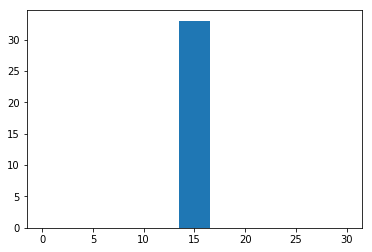

In [33]:
see_sampling_distribution(30, tempos)

## Cost Function

In [9]:
def cost_function_tang(number_sampling = 5, beta = 1):
    scale = np.arange(-1,1+2/(number_sampling-1),2/(number_sampling-1))
    x = scale
    x = -beta*(x**2)
    x = np.exp(x)
    return (1-x)/(1+x)